In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

In [ ]:
print(list(range(9)))

[0, 1, 2, 3, 4, 5, 6, 7, 8]


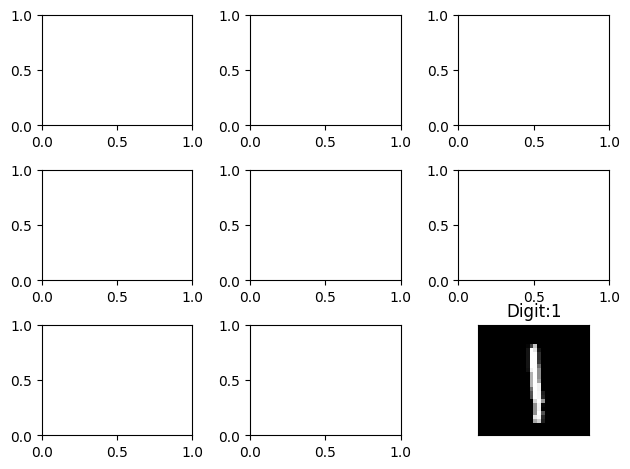

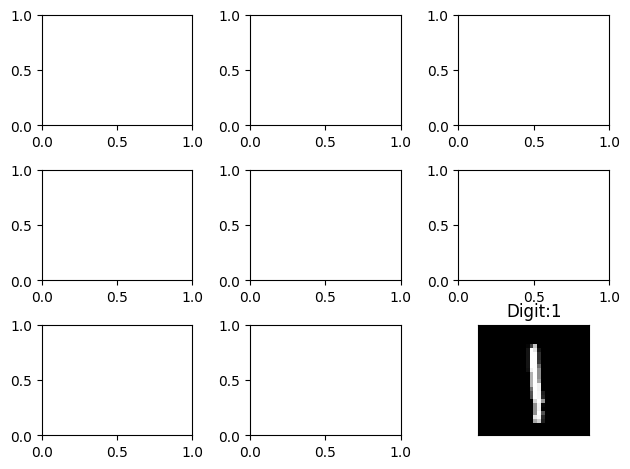

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
plt.imshow(train_images[i],cmap='gray',interpolation='none')
plt.title("Digit:{}".format(train_labels[i]))
plt.xticks([])
plt.yticks([])
fig


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.shape[0]

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(10000,28,28,1)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8985 - loss: 0.3190 - val_accuracy: 0.9844 - val_loss: 0.0478
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9864 - loss: 0.0449 - val_accuracy: 0.9912 - val_loss: 0.0274
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9897 - loss: 0.0320 - val_accuracy: 0.9920 - val_loss: 0.0256
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9928 - loss: 0.0211 - val_accuracy: 0.9880 - val_loss: 0.0345
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9909 - val_loss: 0.0318


In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f'test accuracy:{test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9883 - loss: 0.0407
test accuracy:0.9908999800682068


In [ ]:
test_loss,test_acc = model.evaluate(train_images, train_labels)
print(f'train accuracy: {test_acc}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9954 - loss: 0.0134
train accuracy: 0.9954666495323181


In [ ]:
import numpy as np

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
len(predictions)

10000

In [ ]:
predictions

array([[1.4875280e-10, 9.0069911e-08, 3.6369602e-08, ..., 9.9999934e-01,
        1.4048501e-08, 4.3616478e-08],
       [6.0918541e-09, 3.9227666e-06, 9.9999601e-01, ..., 2.2407727e-13,
        8.7837126e-11, 1.6316580e-16],
       [1.1672606e-08, 9.9998921e-01, 1.2546452e-08, ..., 3.1289965e-06,
        2.0382592e-07, 1.9826672e-08],
       ...,
       [3.8908331e-15, 6.0859925e-08, 1.2520068e-09, ..., 6.4573477e-08,
        1.6185561e-08, 2.5378115e-09],
       [2.5031528e-09, 1.7972178e-11, 7.9896830e-14, ..., 2.3069656e-14,
        3.9147612e-06, 6.4363698e-10],
       [4.7675115e-08, 2.2428041e-13, 2.0339207e-10, ..., 9.7256919e-18,
        9.1275390e-11, 1.9787060e-12]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
def predict_image(image_index):
  pred_label = np.argmax(predictions[image_index])
  true_label = test_labels[image_index]
  plt.figure()
  plt.imshow(test_images[image_index].reshape(28,28),cmap=plt.cm.binary)
  plt.title(f"Predicted: {pred_label} ,True Label: {true_label}")
  plt.axis("off")
  plt.show()

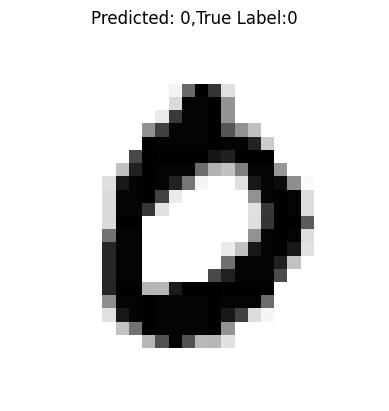

In [ ]:
predict_image(3)

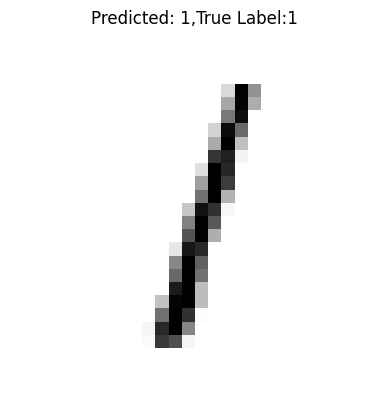

In [ ]:
predict_image(2)

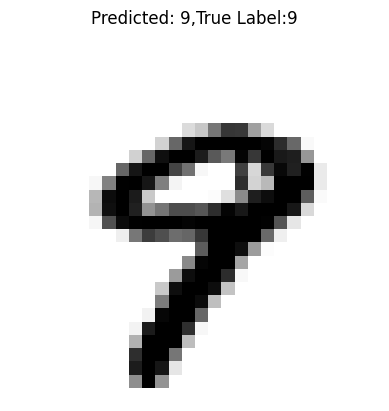

In [ ]:
predict_image(9)

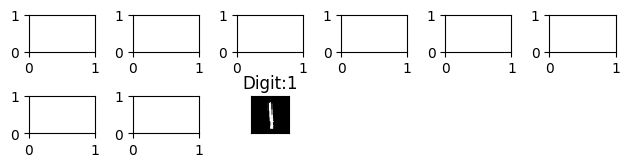

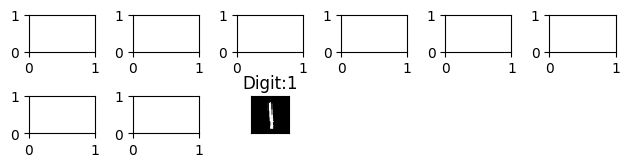

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(6,6,i+1)
  plt.tight_layout()
plt.imshow(train_images[i],cmap='gray',interpolation='none')
plt.title("Digit:{}".format(train_labels[i]))
plt.xticks([])
plt.yticks([])
fig


In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_images.shape[0]

60000

In [ ]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64,(6,6),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(6,6),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(12,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 182s 96ms/step - accuracy: 0.4722 - loss: 1.4234 - val_accuracy: 0.9517 - val_loss: 0.1525
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 94ms/step - accuracy: 0.9598 - loss: 0.1269 - val_accuracy: 0.9754 - val_loss: 0.0763
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 175s 93ms/step - accuracy: 0.9747 - loss: 0.0804 - val_accuracy: 0.9788 - val_loss: 0.0627
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 95ms/step - accuracy: 0.9805 - loss: 0.0603 - val_accuracy: 0.9772 - val_loss: 0.0620
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 95ms/step - accuracy: 0.9855 - loss: 0.0474 - val_accuracy: 0.9837 - val_loss: 0.0496


In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'test accuracy : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9804 - loss: 0.0595
test accuracy : 0.9836999773979187


In [ ]:
test_loss,test_acc = model.evaluate(train_images,train_labels)
print(f'train accuracy : {test_acc}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9870 - loss: 0.0411
train accuracy : 0.9869333505630493


In [ ]:
import numpy as np

In [ ]:
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [ ]:
len(predictions)

10000

In [ ]:
predictions

array([[6.66143023e-07, 3.70269390e-07, 2.08848778e-05, ...,
        1.49003419e-04, 1.96907893e-13, 2.31278972e-13],
       [1.96793844e-04, 1.38456289e-05, 9.99716759e-01, ...,
        7.36060102e-09, 4.04303225e-14, 1.72184993e-14],
       [9.05217348e-06, 9.99164164e-01, 1.92091669e-04, ...,
        2.63836023e-06, 9.89491689e-09, 3.12460346e-09],
       ...,
       [1.64897054e-10, 1.61105811e-06, 1.19094485e-08, ...,
        7.23328003e-06, 1.01290360e-15, 1.40895672e-15],
       [3.85566381e-07, 2.57067541e-07, 8.17943580e-09, ...,
        8.01315309e-06, 5.13941537e-13, 7.60997873e-13],
       [5.14562407e-06, 3.48740703e-09, 3.75159814e-08, ...,
        2.33164261e-08, 8.53222224e-13, 1.44710090e-12]], dtype=float32)

In [ ]:
np.argmax(predictions[4])

4

In [ ]:
def predict_image(image_index):
  pred_label = np.argmax(predictions[image_index])
  true_label = test_labels[image_index]
  plt.figure()
  plt.imshow(test_images[image_index].reshape(28,28),cmap=plt.cm.binary)
  plt.title(f"Predicted: {pred_label} ,True Label: {true_label}")
  plt.axis("off")
  plt.show()

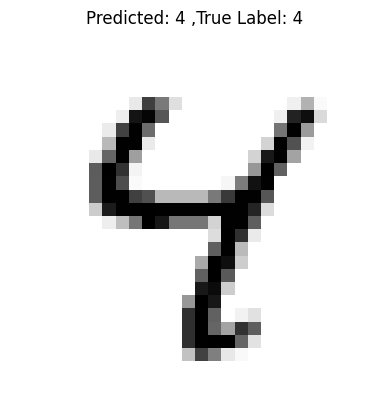

In [ ]:
predict_image(6)

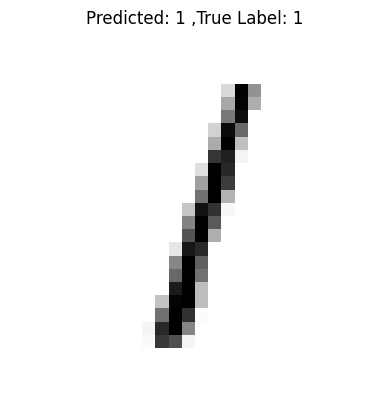

In [ ]:
predict_image(2)

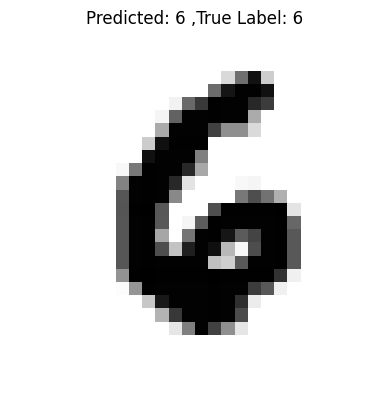

In [ ]:
predict_image(130)

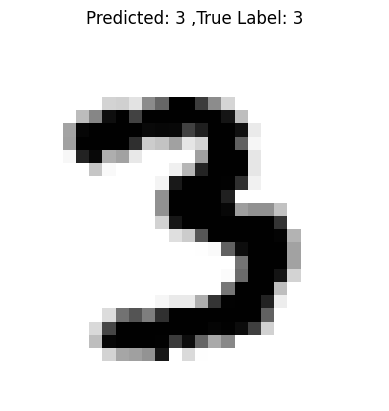

In [ ]:
predict_image(500)